In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
import pymc as pm
from datetime import timedelta

## Get first generic futures prices

In [14]:
path = "C:/Users/pc/Desktop/SG_project/Data/generic_prices/"

files_to_read = [
'snp_futeres_price',
'vix_futeres_price',
'yen_futeres_price', 
'two_years_us_yield',
'five_years_us_yield',              
'ten_years_us_yield',
'euro_dollar_futeres_price',
'wheat_hrw_futeres_price',
'live_cattle_futeres_price',  
'feeder_cattle_futeres_price',   
'gold_futeres_price', 
'coffee_futeres_price', 
'nut_gas_ice_futeres_price',
'nut_gas_nymex_futeres_price', 
'crude_oil_ls_futeres_price',
'soybean_oil_futeres_price', 
'corn_futeres_price',
'frzn_orange_juice_futures_price', 
'sugar_futures_price', 
'copper_futures_price']

# read treasury futures separately because of the required conversion to decimal price (new column was created)
treasury_futures = ['two_tnote_futeres_price', 'five_tnote_futeres_price', 'ten_tnote_futeres_price', ]
# much shorted timeseries than other, will read separately
#read_separately = ['ten_ultra_tnote_futeres_price', 'prob_of_hike']

start = "2010-10-01"; end = "2018-04-25"
index = pd.bdate_range(start=start, end=end)
df = pd.DataFrame(index=index)
for file in files_to_read:
    data = pd.read_csv(path+file+".csv", parse_dates=True, index_col=[0])
    data = data.rename(columns={"Last Price": file})
    data[file] = pd.to_numeric(np.reshape(data.values,-1), errors="coerce")
    df = df.join(data, how='left') 
    
for file in treasury_futures:
    data = pd.read_csv(path+file+".csv", parse_dates=True, index_col=[0], usecols=[0,2])
    data = data.rename(columns={"Decimal Price": file})
    data[file] = pd.to_numeric(np.reshape(data.values,-1), errors="coerce")
    df = df.join(data, how='left')
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,...,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,...,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,...,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,...,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,...,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,...,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625


In [15]:
df.isnull().sum()

snp_futeres_price                  66
vix_futeres_price                  70
yen_futeres_price                  66
two_years_us_yield                 83
five_years_us_yield                83
ten_years_us_yield                 83
euro_dollar_futeres_price          66
wheat_hrw_futeres_price            68
live_cattle_futeres_price          68
feeder_cattle_futeres_price        67
gold_futeres_price                 68
coffee_futeres_price               69
nut_gas_ice_futeres_price          26
nut_gas_nymex_futeres_price        68
crude_oil_ls_futeres_price         68
soybean_oil_futeres_price          67
corn_futeres_price                 68
frzn_orange_juice_futures_price    68
sugar_futures_price                69
copper_futures_price               68
two_tnote_futeres_price            78
five_tnote_futeres_price           78
ten_tnote_futeres_price            95
dtype: int64

In [18]:
# fillna with the average of the nearest neighbors
df = df.where(df==np.nan, other=(df.fillna(method="ffill")+df.fillna(method="bfill"))/2)
df.isnull().sum()

snp_futeres_price                  0
vix_futeres_price                  0
yen_futeres_price                  0
two_years_us_yield                 0
five_years_us_yield                0
ten_years_us_yield                 0
euro_dollar_futeres_price          0
wheat_hrw_futeres_price            0
live_cattle_futeres_price          0
feeder_cattle_futeres_price        0
gold_futeres_price                 0
coffee_futeres_price               0
nut_gas_ice_futeres_price          0
nut_gas_nymex_futeres_price        0
crude_oil_ls_futeres_price         0
soybean_oil_futeres_price          0
corn_futeres_price                 0
frzn_orange_juice_futures_price    0
sugar_futures_price                0
copper_futures_price               0
two_tnote_futeres_price            0
five_tnote_futeres_price           0
ten_tnote_futeres_price            0
dtype: int64

In [5]:
import pickle
def save_obj(obj, name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
save_obj(df, "df_generic1_prices")

In [6]:
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,...,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,...,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,...,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,...,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,...,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,...,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625


In [826]:
df_diff = df-df.shift(1)
# align start and end with the cftc data index 
start1 = pd.to_datetime('2011-01-04 00:00:00'); end1 = pd.to_datetime('2018-04-03 00:00:00')
df_diff = df_diff[start1:end1]
save_obj(df_diff, "df_generic1_price_change")
df_diff.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,...,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
2011-01-04,0.00,-0.20,-0.54,0.0238,0.0033,-0.0037,-0.025,-13.75,-0.800,-0.250,...,0.019,-2.17,-0.76,-12.00,-2.75,-0.56,-8.85,-0.031250,0.031250,0.140625
2011-01-05,6.50,-0.40,-1.96,0.0874,0.1324,0.1367,-0.175,24.00,0.450,-0.025,...,-0.196,0.92,0.92,10.75,4.40,1.20,3.90,-0.234375,-0.671875,-1.078125
2011-01-06,-1.50,-0.05,0.06,-0.0397,-0.0731,-0.0722,0.110,-14.75,0.100,0.950,...,-0.039,-1.92,-0.35,-17.25,1.40,-1.96,-7.85,0.101562,0.320312,0.578125
2011-01-07,-2.75,0.05,0.35,-0.0717,-0.1059,-0.0695,0.090,-12.25,-0.350,-0.325,...,-0.012,-0.35,-0.55,-7.00,5.25,1.29,-4.70,0.164062,0.656250,0.859375
2011-01-10,-2.00,-0.05,0.34,-0.0240,-0.0463,-0.0405,0.035,-4.75,0.575,0.700,...,-0.023,1.22,0.31,12.00,-3.05,0.21,-1.80,0.054688,0.125000,0.203125


In [8]:
prob_of_hike = pd.read_csv(path+"prob_of_hike.csv", parse_dates=True, index_col=[0])
prob_of_hike = prob_of_hike.reindex(index=prob_of_hike.index[::-1])
prob_of_hike.head()

,Probability of Hike,Probability of No Change (1.5-1.75),Probability of Cut
Date,,,
2017-05-11,7.5,24.5,68.1
2017-05-12,3.9,19.1,77.0
2017-05-15,3.0,16.8,80.2
2017-05-16,3.0,16.8,80.2
2017-05-17,1.4,10.1,88.5


## Get prepared cftc data

In [9]:
def load_obj(name ):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
dictionary_commodities = load_obj("dictionary_commodities")
dictionary_financials = load_obj("dictionary_financials")

In [10]:
dictionary_commodities.keys()

dict_keys(['WHEAT - MINNEAPOLIS GRAIN EXCHANGE', 'WHEAT-SRW - CHICAGO BOARD OF TRADE', 'WHEAT-HRW - CHICAGO BOARD OF TRADE', 'WHEAT-HRSpring - MINNEAPOLIS GRAIN EXCHANGE', 'CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE', 'COTTON NO. 2 - ICE FUTURES U.S.', 'ROUGH RICE - CHICAGO BOARD OF TRADE', 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE', 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE', 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE', 'SOYBEANS - CHICAGO BOARD OF TRADE', 'SOYBEAN OIL - CHICAGO BOARD OF TRADE', 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE', 'COCOA - ICE FUTURES U.S.', 'SUGAR NO. 11 - ICE FUTURES U.S.', 'COFFEE C - ICE FUTURES U.S.', 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE', 'GOLD - COMMODITY EXCHANGE INC.', 'NATURAL GAS - NEW YORK MERCANTILE EXCHANGE', 'NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV', 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.', 'FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.'])

In [11]:
dictionary_financials.keys()

dict_keys(['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE', 'VIX FUTURES - CBOE FUTURES EXCHANGE', 'EURO FX - CHICAGO MERCANTILE EXCHANGE', '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE', 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE', 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE', '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', 'ULTRA 10-YEAR U.S. T-NOTES - CHICAGO BOARD OF TRADE', 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'])

In [12]:
dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'].columns

Index(['Market_and_Exchange_Names', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Commodity_Code', 'Open_Interest_All',
       'Dealer_Positions_Long_All', 'Dealer_Positions_Short_All',
       'Dealer_Positions_Spread_All', 'Asset_Mgr_Positions_Long_All',
       'Asset_Mgr_Positions_Short_All', 'Asset_Mgr_Positions_Spread_All',
       'Lev_Money_Positions_Long_All', 'Lev_Money_Positions_Short_All',
       'Lev_Money_Positions_Spread_All', 'Tot_Rept_Positions_Long_All',
       'Tot_Rept_Positions_Short_All', 'Change_in_Open_Interest_All',
       'Change_in_Dealer_Long_All', 'Change_in_Dealer_Short_All',
       'Change_in_Dealer_Spread_All', 'Change_in_Asset_Mgr_Long_All',
       'Change_in_Asset_Mgr_Short_All', 'Change_in_Asset_Mgr_Spread_All',
       'Change_in_Lev_Money_Long_All', 'Change_in_Lev_Money_Short_All',
       'Change_in_Lev_Money_Spread_All', 'Change_in_Tot_Rept_Long_All',
       'Change_in_Tot_Rept_Short_All', 'Pct_of_Open_Interest_All',
       'Pct_of_OI_D

In [606]:
save_obj(dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'].index, "cftc_index")

In [13]:
dictionary_commodities['WHEAT - MINNEAPOLIS GRAIN EXCHANGE'].columns

Index(['Market_and_Exchange_Names', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Commodity_Code', 'Open_Interest_All',
       'Prod_Merc_Positions_Long_ALL', 'Prod_Merc_Positions_Short_ALL',
       'Swap_Positions_Long_All', 'Swap__Positions_Short_All',
       'Swap__Positions_Spread_All', 'M_Money_Positions_Long_ALL',
       'M_Money_Positions_Short_ALL', 'M_Money_Positions_Spread_ALL',
       'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All',
       'Change_in_Open_Interest_All', 'Change_in_M_Money_Long_All',
       'Change_in_M_Money_Short_All', 'Change_in_M_Money_Spread_All',
       'Pct_of_OI_M_Money_Long_All', 'Pct_of_OI_M_Money_Short_All',
       'Pct_of_OI_M_Money_Spread_All', 'Traders_Prod_Merc_Long_All',
       'Traders_Prod_Merc_Short_All', 'Traders_Swap_Long_All',
       'Traders_Swap_Short_All', 'Traders_Swap_Spread_All',
       'Traders_M_Money_Long_All', 'Traders_M_Money_Short_All',
       'Traders_M_Money_Spread_All', 'Traders_Other_Rept_Lon

In [719]:
def set_cftc_index(df, fill_method):
    use_index = load_obj("cftc_index")
    df = df.reindex(pd.date_range(use_index[0],use_index[-1], freq='D'))
    #df = df.asfreq("D")
    if fill_method == "ffill":
        df.fillna(method="ffill", inplace=True)
        # fill the remaining
        df.fillna(method="bfill", inplace=True)
    elif fill_method == "bfill":
        df.fillna(method="bfill", inplace=True)
        # fill the remaining
        df.fillna(method="ffill", inplace=True)
    elif fill_method == "avg":
        df = df.where(df==np.nan, other=(df.fillna(method="ffill")+df.fillna(method="bfill"))/2)
        # fill the remaining
        df.fillna(method="ffill", inplace=True)
        df.fillna(method="bfill", inplace=True)
    
    df = df.reindex(use_index)    
    return pd.DataFrame(df)

In [827]:
df_diff = set_cftc_index(df_diff, "avg")

In [828]:
df_diff.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,...,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.000,-0.200,-0.540,0.0238,0.00330,-0.0037,-0.0250,-13.75,-0.8000,-0.250,...,0.0190,-2.17,-0.760,-12.000,-2.750,-0.560,-8.85,-0.031250,0.031250,0.140625
2011-01-11,5.000,-0.700,-0.650,0.0159,0.04940,0.0564,-0.0750,-3.50,1.5000,1.150,...,0.0820,1.86,-0.490,0.000,-6.600,1.010,8.45,-0.015625,-0.164062,-0.328125
2011-01-18,2.625,-0.175,0.315,0.0080,0.01645,0.0216,-0.0375,8.25,-0.0875,0.850,...,-0.0275,-0.08,0.425,5.375,1.175,0.115,0.80,0.000000,-0.257812,-0.132812
2011-01-25,-1.000,-0.200,0.500,-0.0490,-0.07000,-0.0760,0.0900,9.50,-0.5250,-0.375,...,-0.1070,-1.68,-1.400,-11.250,-0.150,-0.470,-12.25,0.085938,0.375000,0.687500
2011-02-01,20.250,-1.150,0.890,0.0393,0.07250,0.0690,-0.0800,-0.75,0.0500,-0.525,...,-0.0730,-1.42,0.840,6.500,1.000,-0.010,8.85,-0.093750,-0.343750,-0.500000


In [669]:
snp_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/^GSPC.csv", parse_dates=True, index_col=[0], usecols=[0,5])
snp_index = snp_index.rename(columns={"Adj Close":"S&P_index"})

In [670]:
vix_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/^VIX.csv", parse_dates=True, index_col=[0], usecols=[0,5])
vix_index = vix_index.rename(columns={"Adj Close":"VIX_index"})

In [720]:
fed_funds_rate =pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/FEDFUNDS.csv", index_col=[0], parse_dates=True)
fed_funds_rate.loc["2011-01-04":].head()

,FEDFUNDS
DATE,
2011-02-01,0.16
2011-03-01,0.14
2011-04-01,0.10
2011-05-01,0.09
2011-06-01,0.09


In [727]:
snp_index_diff = set_cftc_index(snp_index-snp_index.shift(), "avg")
snp_index = set_cftc_index(snp_index, "avg")
vix_index_diff = set_cftc_index(vix_index-vix_index.shift(), "avg")
vix_index = set_cftc_index(vix_index, "avg")

In [728]:
# vix_index.isnull().unstack()[vix_index.isnull().unstack()]

,snp_futeres_price
,
2011-01-04,0.000
2011-01-11,5.000
2011-01-18,2.625
2011-01-25,-1.000
2011-02-01,20.250


In [730]:
ten_years_us_yield = set_cftc_index(df["ten_years_us_yield"], "avg")
five_years_us_yield = set_cftc_index(df["five_years_us_yield"], "avg")
two_years_us_yield = set_cftc_index(df["two_years_us_yield"], "avg")

In [844]:
def plot_scatter(x, y, lag):
    print("Regression is done with lag ", lag)
    import matplotlib as mpl
    
    if lag != 0:
        x = pd.DataFrame(x - x.shift(lag))
        # merge data and drop NaN. If want to perform regression with lags (so regression 
        # doesn't crash because of the NaN).
        joined = x.join(pd.DataFrame(y), how='outer').dropna(0)
        plt_dates = mpl.dates.date2num(joined.index.to_pydatetime())
        x = joined[joined.columns[0]].values.reshape(-1); y = joined[joined.columns[1]].values.reshape(-1)
        
    else:
        x = x.values.reshape(-1); y = y.values.reshape(-1)
        plt_dates = mpl.dates.date2num(load_obj("cftc_index").to_pydatetime())
        
    plt.rc('figure',figsize=(16,8))
    #plt.axhline(y=0, linestyle='--', lw=.5, color='black')
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print("R-squared(whole data set): ",r_value**2)
    line2_plot = intercept + slope*x
    cm = plt.cm.get_cmap('viridis')
    plt.plot(x, line2_plot, color='red', lw=.5)
    # last 50 data points correspond roughly to a year   
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[-50:], y[-50:])
    print("R-squared(last year): ",r_value**2)
    line2_plot = intercept + slope*x[-50:]
    plt.plot(x[-50:], line2_plot, color='red', lw=.5)
    plt.scatter(x, y, c=plt_dates, s=fed_funds_rate*40,  cmap=cm)
    
    #plt.xlabel(str(x.columns[0]), fontsize=14)
    #plt.ylabel(str(y.columns[0]), fontsize=14)
    plt.colorbar(ticks=mpl.dates.YearLocator(1, month=6), format=mpl.dates.DateFormatter('%d %b %y'))

Regression is done with lag  0
R-squared(whole data set):  0.000665389177547
R-squared(last year):  0.543825769222


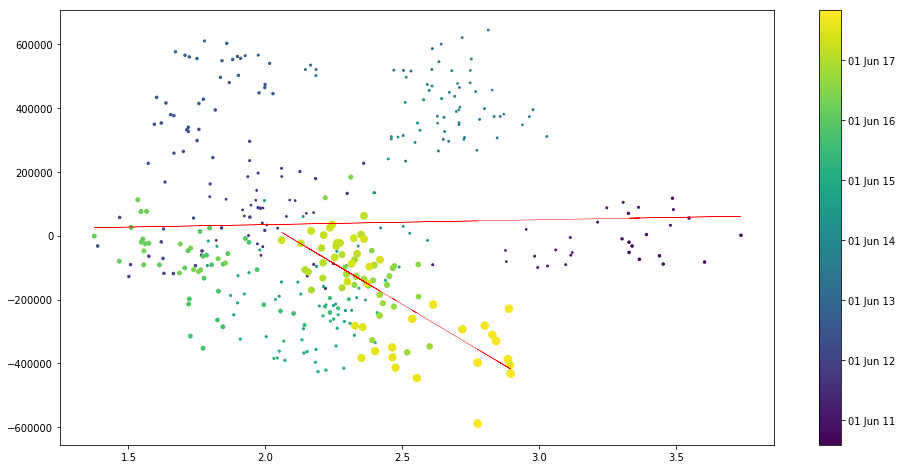

In [860]:
plot_scatter(ten_years_us_yield, dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
             ["Net_Positioning_Lev_Money"], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money
# E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE

Regression is done with lag  0
R-squared(whole data set):  0.0145513636329
R-squared(last year):  0.718187021765


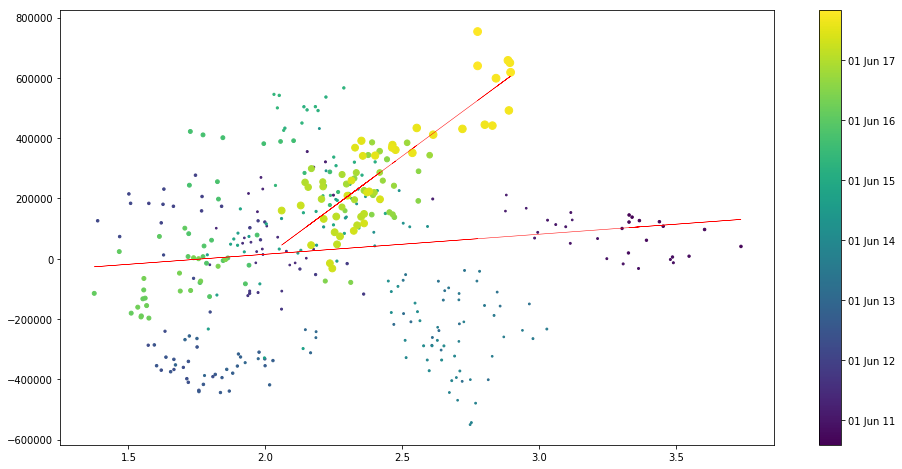

In [861]:
plot_scatter(ten_years_us_yield, dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
             ["Net_Positioning_Asset_Mgr"], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money
# E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE

Regression is done with lag  0
R-squared(whole data set):  0.636879034652
R-squared(last year):  0.523592687598


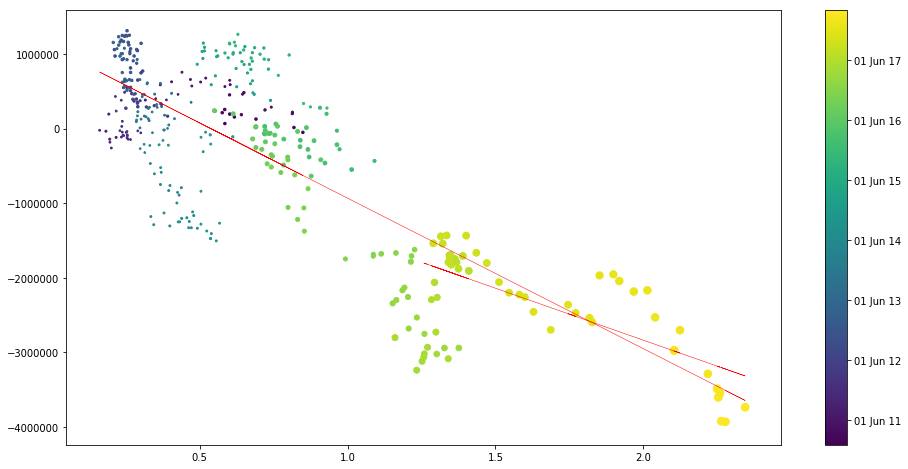

In [858]:
plot_scatter(two_years_us_yield, dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Lev_Money"], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

Regression is done with lag  0
R-squared(whole data set):  0.106529923933
R-squared(last year):  0.641824608151


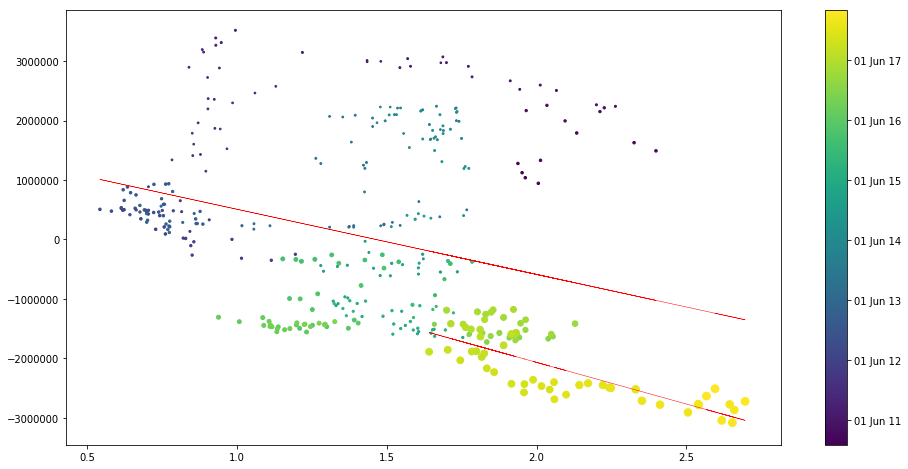

In [859]:
plot_scatter(five_years_us_yield, dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Asset_Mgr"], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

Regression is done with lag  0
R-squared(whole data set):  0.0937925116592
R-squared(last year):  0.508634420277


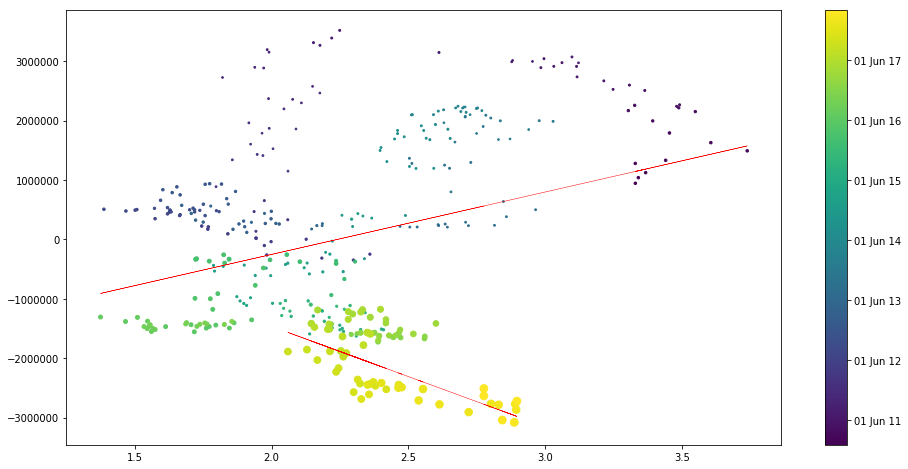

In [848]:
plot_scatter(ten_years_us_yield, dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Asset_Mgr"], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

Regression is done with lag  0
R-squared(whole data set):  0.491750467993
R-squared(last year):  0.75021765153


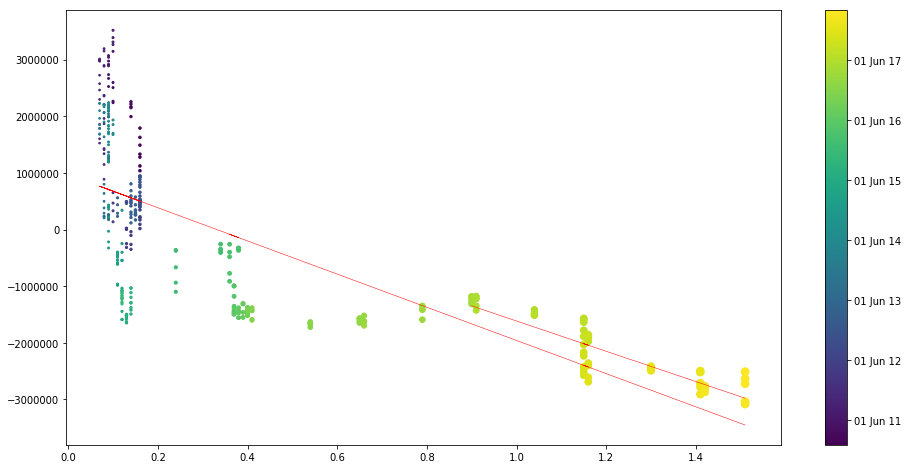

In [849]:
plot_scatter(fed_funds_rate, dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Asset_Mgr"], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

Regression is done with lag  1
R-squared(whole data set):  0.169382218496
R-squared(last year):  0.0504502698682


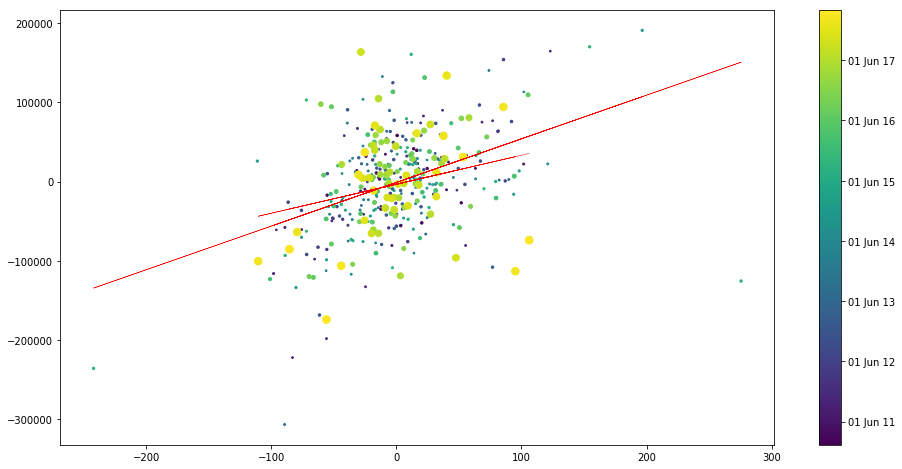

In [855]:
plot_scatter(snp_index_diff, \
dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE']["Change_in_Net_Positioning_Asset_Mgr"], 1)

(-0.43365301615629853, 8.266027337411306e-19)
(-0.68563058164547452, 6.1420962206022993e-54)
(-0.16707573664248432, 0.0010952170069269825)


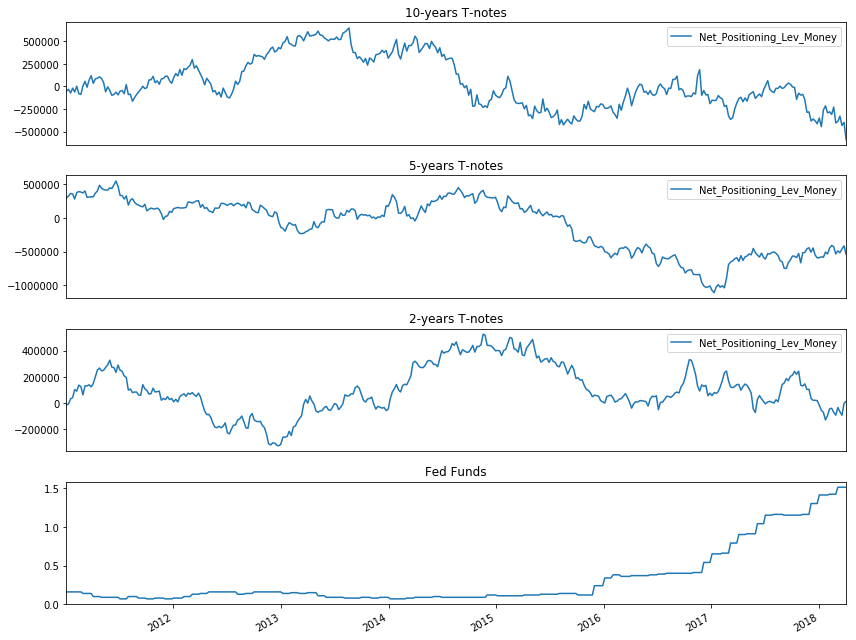

In [809]:
from scipy.stats.stats import pearsonr

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12,9))
#axes[0].title.set_size(55)

dictionary_financials['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"].plot(ax=axes[0], legend=True, xticks=[], title="10-years T-notes")
dictionary_financials['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"].plot(ax=axes[1], legend=True, xticks=[], title="5-years T-notes")
dictionary_financials['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"].plot(ax=axes[2], legend=True, xticks=[], title="2-years T-notes")
fed_funds_rate.plot(ax=axes[3], title="Fed Funds", legend=False)
plt.tight_layout()
#print(pearsonr(y, fed_funds_rate.values.reshape(-1)))

print(pearsonr(dictionary_financials['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))
print(pearsonr(dictionary_financials['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))
print(pearsonr(dictionary_financials['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))